In [ ]:
import numpy as np # linear algebra
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [ ]:
df=pd.read_csv("/content/bank_marketing_dataset.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
df.shape


(41188, 21)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [ ]:
#structural information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,39.939485,10.129367,17.000,32.000,38.000,47.000,69.500
duration,41188.0,234.997317,177.353309,0.000,102.000,180.000,319.000,644.500
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
df.previous.value_counts()

,count
previous,
0,35563
1,4561
2,754
3,216
4,70
5,18
6,5
7,1


In [ ]:
df["emp.var.rate"].value_counts()

,count
emp.var.rate,
1.4,16234
-1.8,9184
1.1,7763
-0.1,3683
-2.9,1663
-3.4,1071
-1.7,773
-1.1,635
-3.0,172


In [ ]:
df["job"].value_counts()

,count
job,
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060


In [ ]:
df["marital"].value_counts()

,count
marital,
married,24928
single,11568
divorced,4612
unknown,80


In [ ]:
df["education"].value_counts()

,count
education,
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18


In [ ]:
df["default"].value_counts()

,count
default,
no,32588
unknown,8597
yes,3


In [ ]:
df["housing"].value_counts()

,count
housing,
yes,21576
no,18622
unknown,990


In [ ]:
df["loan"].value_counts()

,count
loan,
no,33950
yes,6248
unknown,990


In [ ]:
df["contact"].value_counts()

,count
contact,
cellular,26144
telephone,15044


In [ ]:
df["month"].value_counts()

,count
month,
may,13769
jul,7174
aug,6178
jun,5318
nov,4101
apr,2632
oct,718
sep,570
mar,546


In [ ]:
df["day_of_week"].value_counts()

,count
day_of_week,
thu,8623
mon,8514
wed,8134
tue,8090
fri,7827


In [ ]:


df["poutcome"].value_counts()

,count
poutcome,
nonexistent,35563
failure,4252
success,1373


In [ ]:
df["subscribed"].value_counts()

,count
subscribed,
no,36548
yes,4640


In [ ]:
#missing values query
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
cat_list=[]
num_list=[]


for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values<13:
        cat_list.append(column_name)
    else:
        num_list.append(column_name)

In [ ]:
num_list

['age',
 'duration',
 'campaign',
 'pdays',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m']

In [ ]:
cat_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'previous',
 'poutcome',
 'emp.var.rate',
 'nr.employed',
 'subscribed']

<ipython-input-60-855fbc376ae7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-60-855fbc376ae7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-60-855fbc376ae7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.

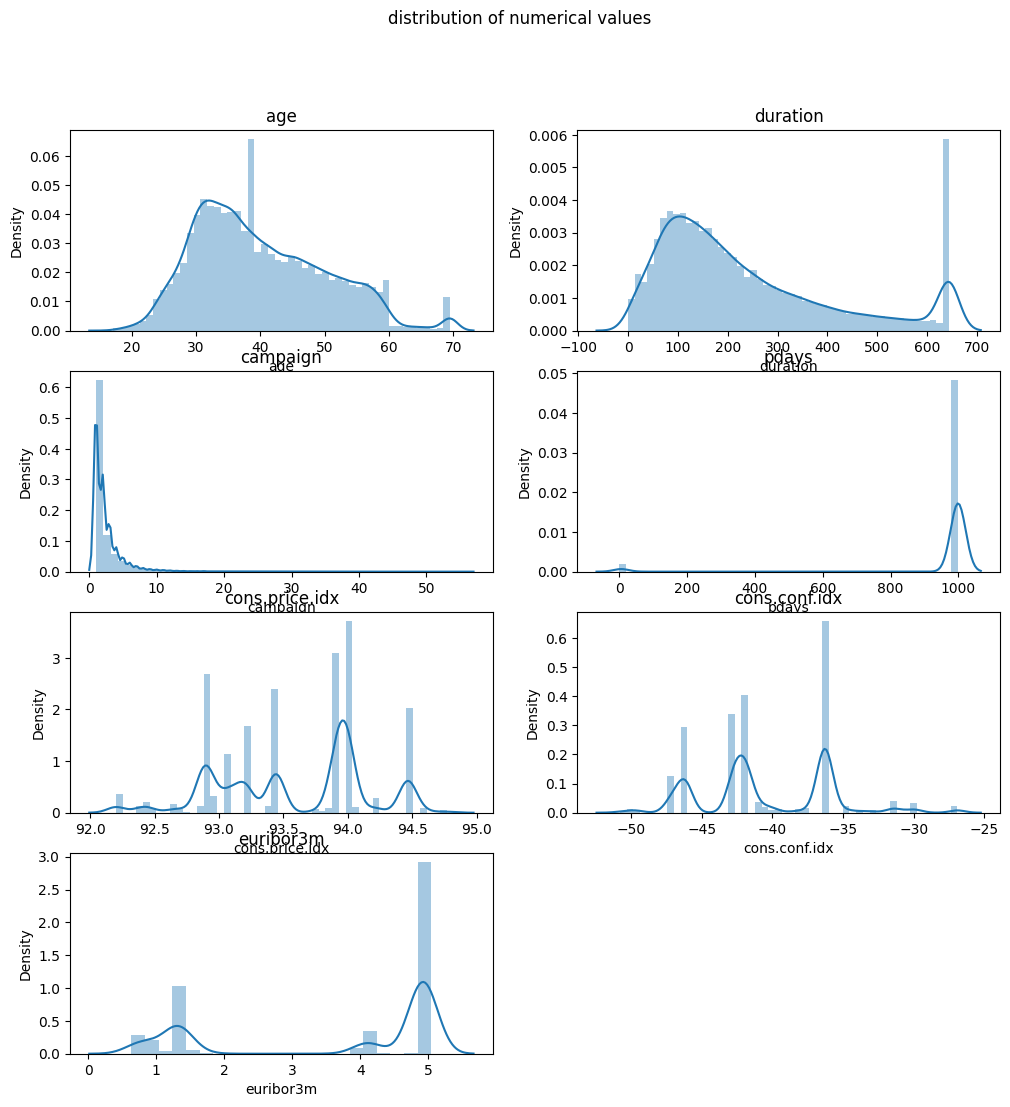

In [ ]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of numerical values")

for i in df.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.distplot(df[i])
    plt.title(i)
    k+=1

In [ ]:
for i in df.loc[:,num_list]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

age yes
duration yes
campaign yes
pdays yes
cons.price.idx no
cons.conf.idx yes
euribor3m no


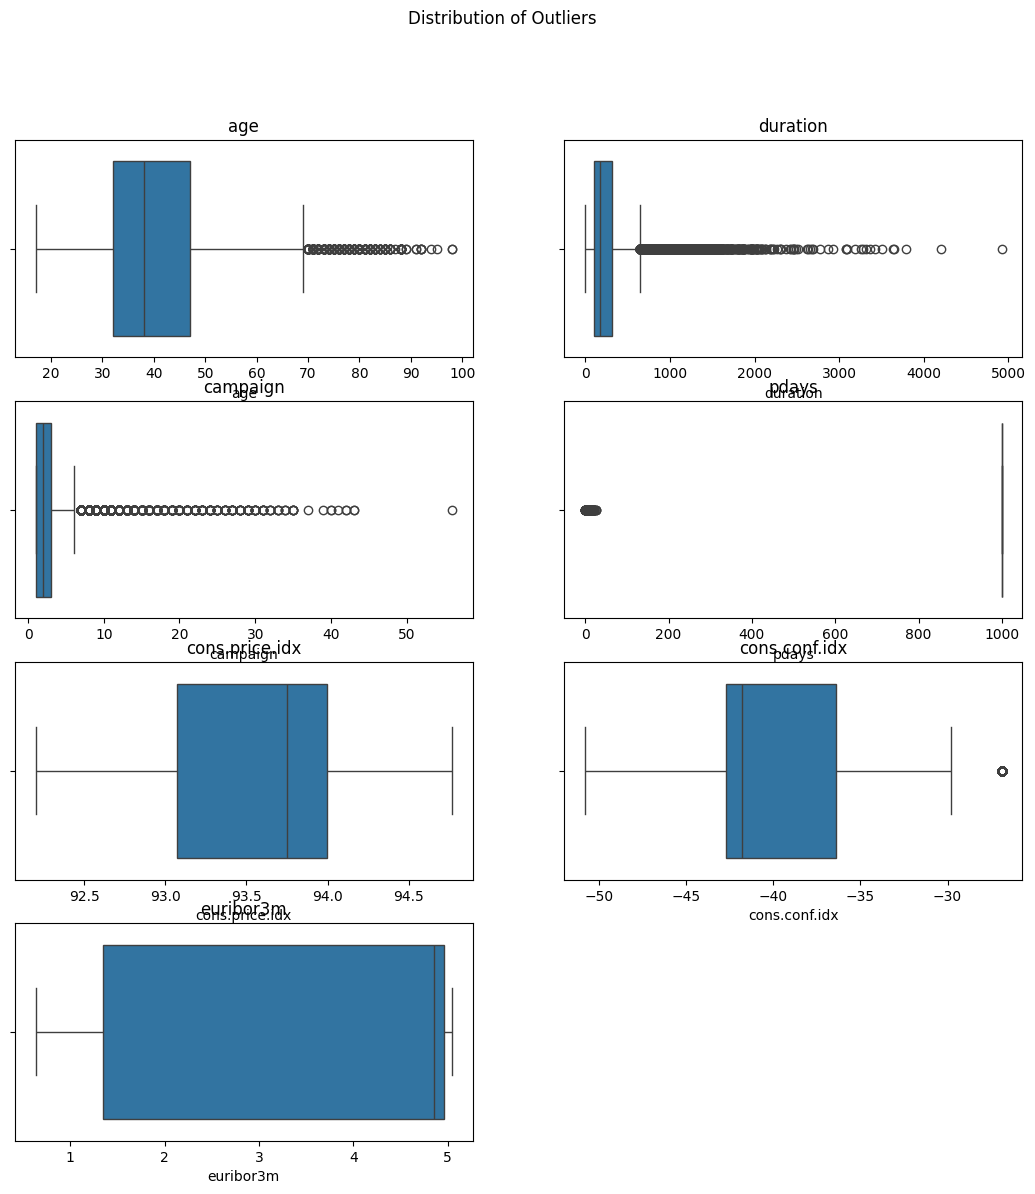

In [ ]:
k=1
plt.figure(figsize=(13,13))
plt.suptitle("Distribution of Outliers")

for i in df.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.boxplot(x = i, data = df.loc[:,num_list])
    plt.title(i)
    k+=1

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:

out_list=["age","duration"]

for i in df.loc[:,out_list]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    df.loc[df[i] > up_lim,i] = up_lim
    df.loc[df[i] < low_lim,i] = low_lim



In [ ]:
for i in df.loc[:,out_list]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")


age no
duration no


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,39.939485,10.129367,17.000,32.000,38.000,47.000,69.500
duration,41188.0,234.997317,177.353309,0.000,102.000,180.000,319.000,644.500
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

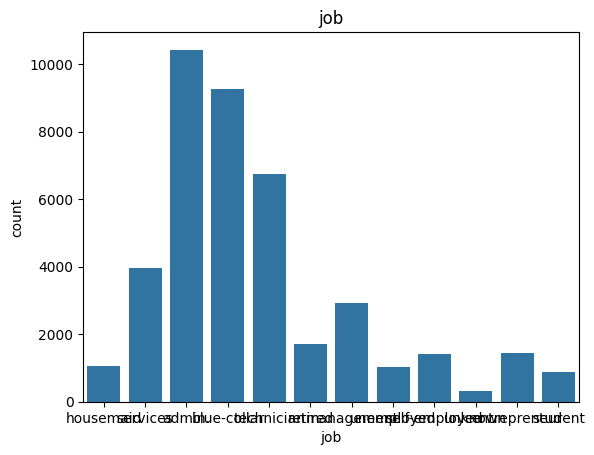

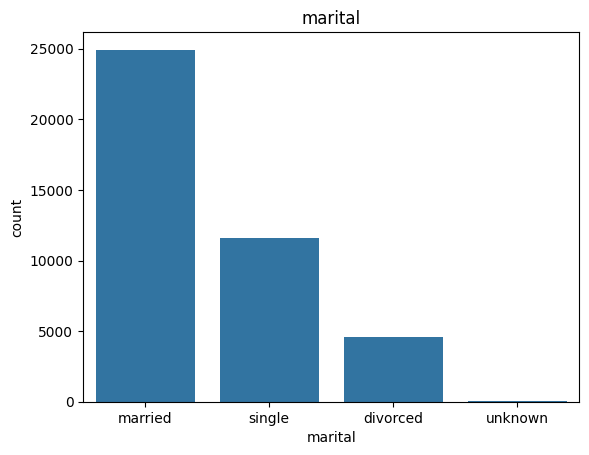

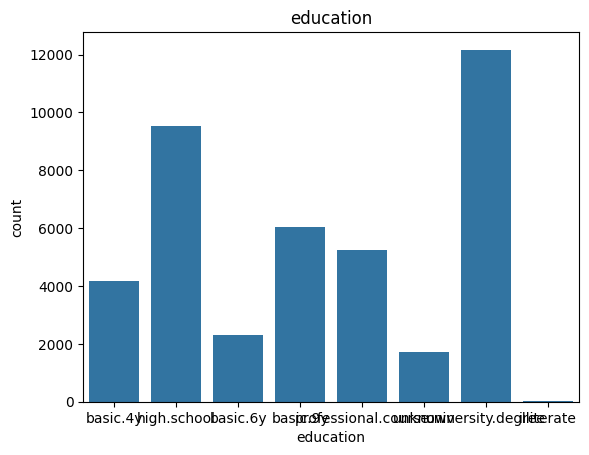

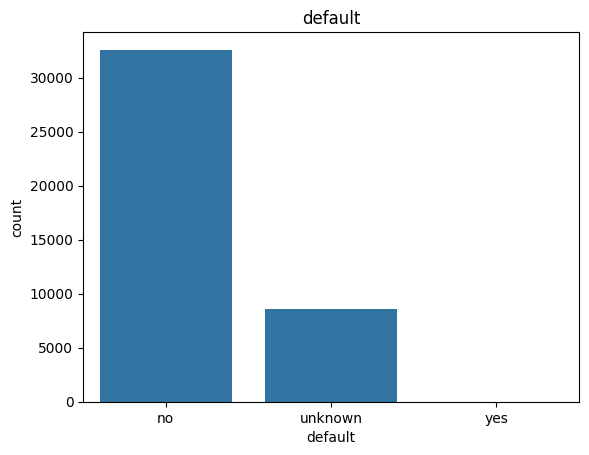

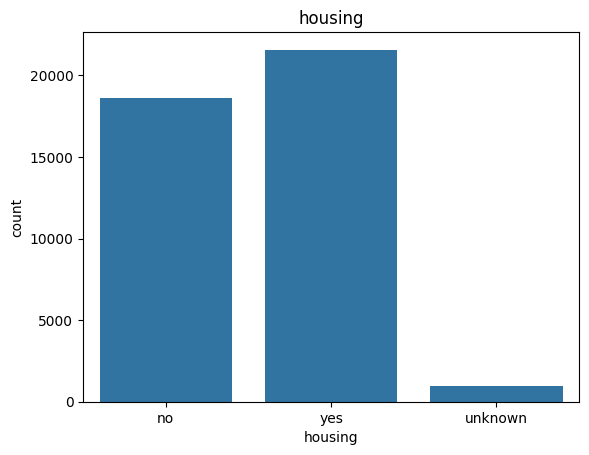

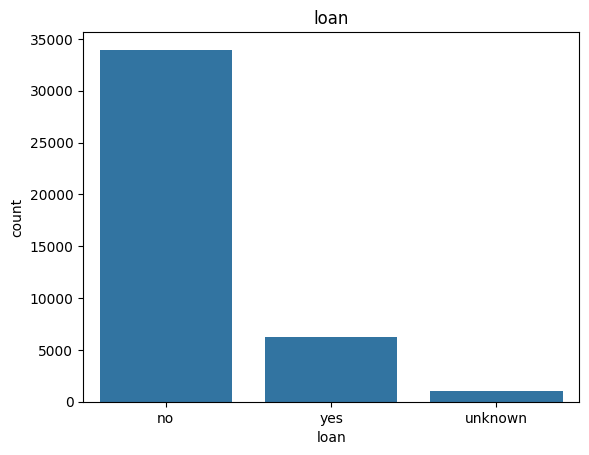

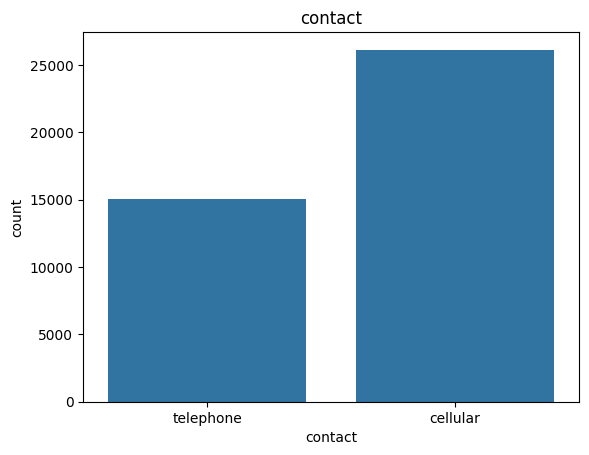

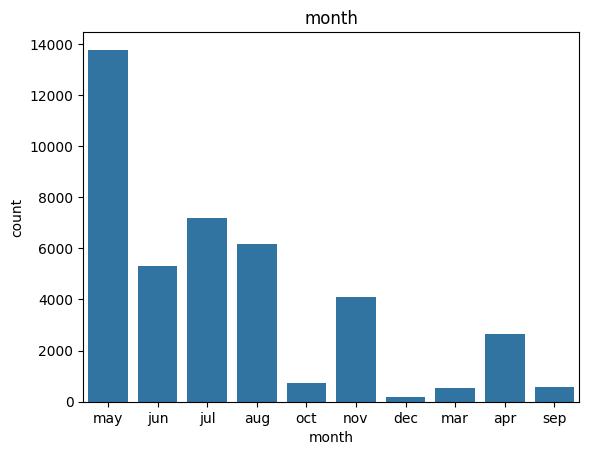

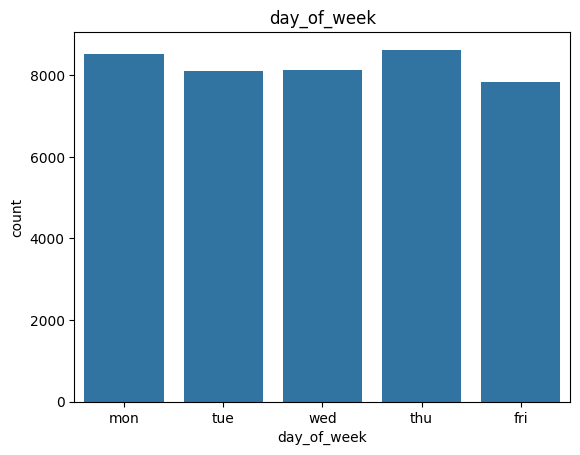

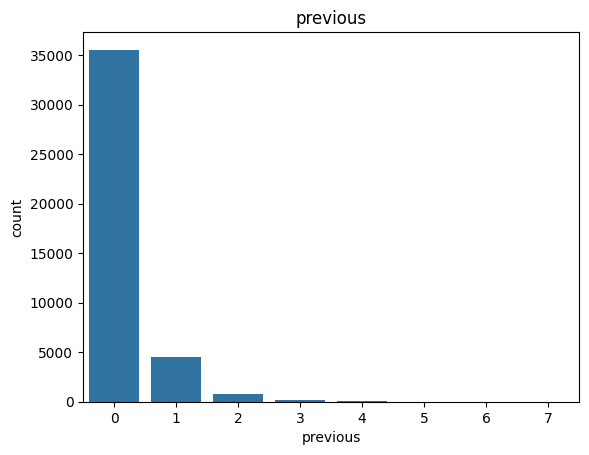

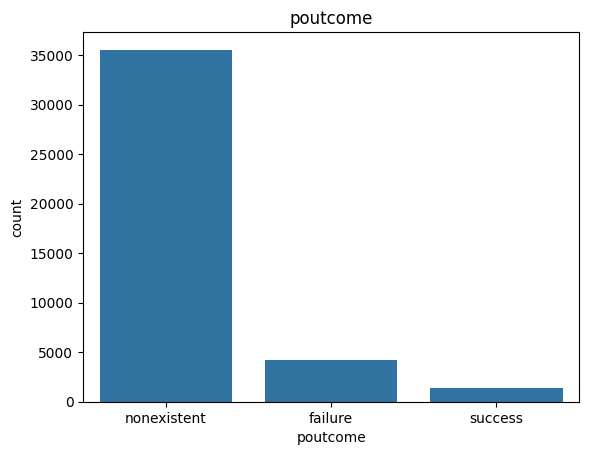

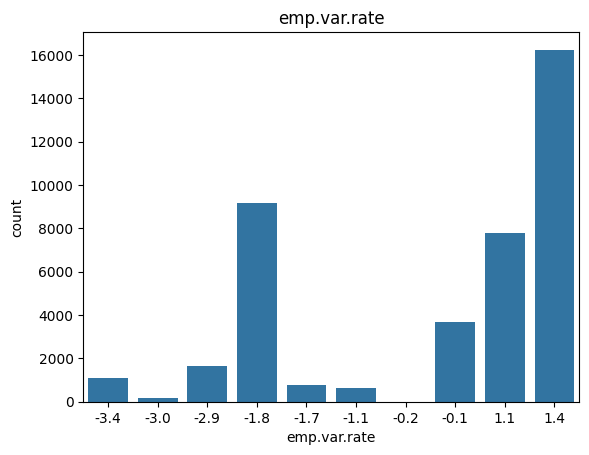

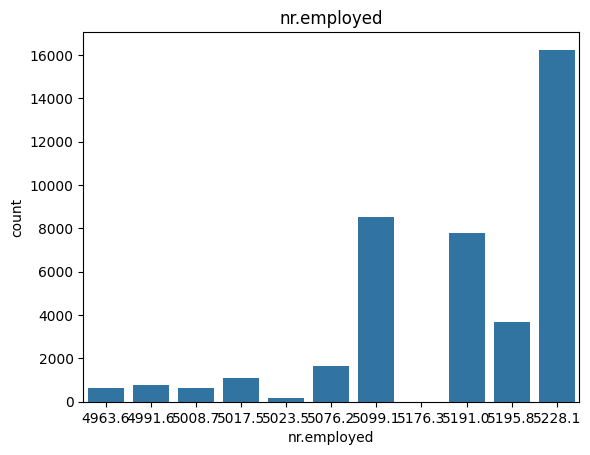

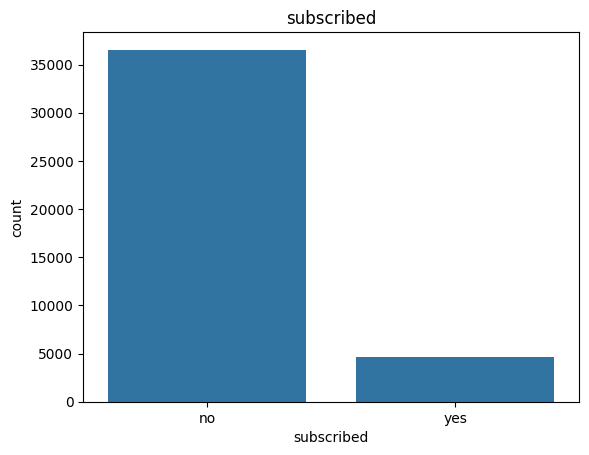

In [ ]:
for i in cat_list:
    plt.figure()
    sns.countplot(x = i, data = df.loc[:,cat_list])
    plt.title(i)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

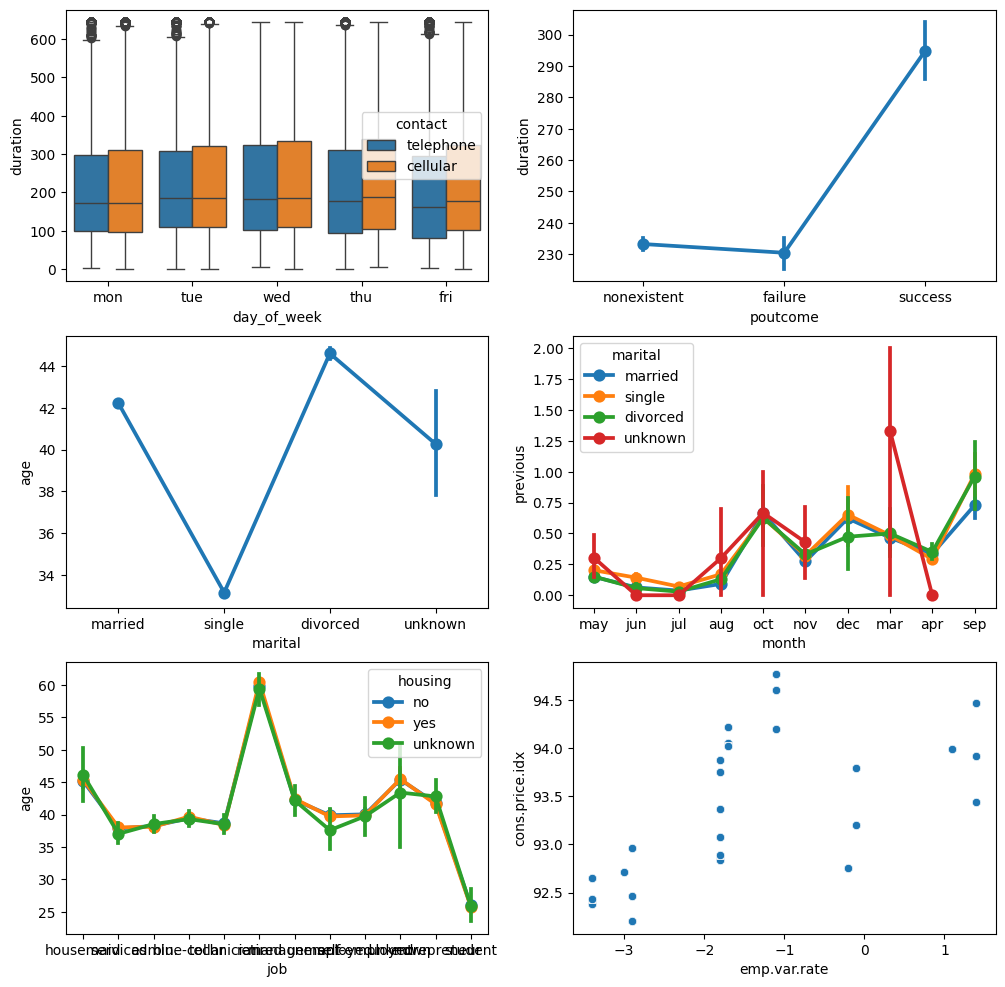

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
sns.boxplot(x ='day_of_week',y ='duration', data = df,hue="contact")
plt.subplot(3,2,2)
sns.pointplot(x ='poutcome',y ='duration', data = df)
plt.subplot(3,2,3)
sns.pointplot(x ='marital',y ='age', data = df)
plt.subplot(3,2,4)
sns.pointplot(x ='month',y ='previous', data = df,hue="marital")
plt.subplot(3,2,5)
sns.pointplot(x ='job',y ='age', data = df,hue="housing")
plt.subplot(3,2,6)
sns.scatterplot(x ='emp.var.rate',y ='cons.price.idx', data = df)
plt.show()

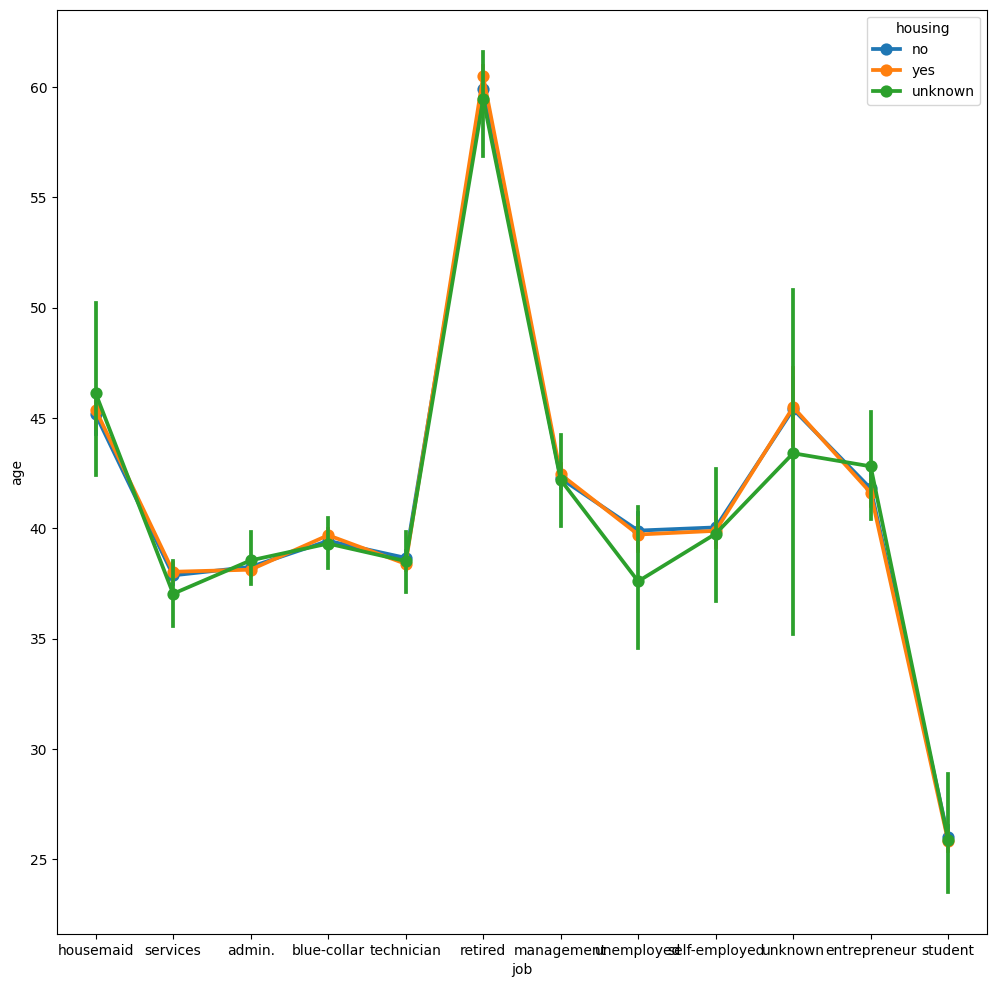

In [ ]:
plt.figure(figsize=(12,12))

sns.pointplot(x ='job',y ='age', data = df,hue="housing");

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lbe=LabelEncoder()

In [ ]:
df["N_job"]=lbe.fit_transform(df["job"])
df["N_marital"]=lbe.fit_transform(df["marital"])
df["N_education"]=lbe.fit_transform(df["education"])
df["N_housing"]=lbe.fit_transform(df["housing"])
df["N_loan"]=lbe.fit_transform(df["loan"])
df["N_contact"]=lbe.fit_transform(df["contact"])
df["N_month"]=lbe.fit_transform(df["month"])
df["N_day_of_week"]=lbe.fit_transform(df["day_of_week"])
df["N_poutcome"]=lbe.fit_transform(df["poutcome"])
df["N_subscribed"]=lbe.fit_transform(df["subscribed"])
df["N_default"]=lbe.fit_transform(df["default"])

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,N_marital,N_education,N_housing,N_loan,N_contact,N_month,N_day_of_week,N_poutcome,N_subscribed,N_default
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,0,1,6,1,1,0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,3,0,0,1,6,1,1,0,1
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,3,2,0,1,6,1,1,0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,1,0,0,1,6,1,1,0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,3,0,2,1,6,1,1,0,0


In [ ]:
df.drop(["job","marital","education","default","housing","loan","contact",
        "month","day_of_week","poutcome","subscribed"],axis=1,inplace=True)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
/kaggle/input/bank-marketing-data-set/bank_marketing_dataset.csv
About Dataset
Context Data set is taken from here. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.

Columns

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
**Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')
10 - dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
**Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
**Social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)
21 - subscribed : has the client subscribed a term deposit? (binary: 'yes','no')
Veri Kümesi Hakkında
**Bağlam

Veri seti buradan alınmıştır. Veriler, bir Portekiz bankacılık kurumunun doğrudan pazarlama kampanyaları (telefon görüşmeleri) ile ilgilidir.

Sütunlar
1 - Age(yaş) (sayısal)
2 - job(iş) : iş türü (kategorik: 'yönetici', 'mavi yakalı', 'girişimci', 'hizmetçi', 'yönetim', 'emekli', 'serbest meslek sahibi', 'hizmetler', 'öğrenci' ,'teknisyen', 'işsiz', 'bilinmeyen')

3 - marital(medeni durum): medeni durum (kategorik: 'boşanmış', 'evli', 'bekar', 'bilinmeyen'; not: 'boşanmış' boşanmış veya dul demektir)

4 - education(eğitim) (kategorik: 'temel.4y','temel.6y','basic.9y','lise.okul','okuma yazma bilmeyen','profesyonel.kurs','üniversite.degree','bilinmeyen')

5 - default(temerrüt): temerrüde kredi var mı? (kategorik: 'hayır', 'evet', 'bilinmeyen')

6 - housing(konut): konut kredisi var mı? (kategorik: 'hayır', 'evet', 'bilinmeyen')
7 -loan( kredi): kişisel kredisi var mı? (kategorik: 'hayır', 'evet', 'bilinmeyen')
**Mevcut kampanyanın son kişisiyle ilgili:

8 - contact(iletişim): iletişim türü (kategorik: 'cep telefonu', 'telefon')
9 -month( ay): yılın son temas ayı (kategorik: 'ocak', 'şubat', 'mar', …, 'kas', 'aralık')
10 - dayofweek(haftanın günü): haftanın son iletişim günü (kategorik: 'pte', 'sal', 'çard', 'per', 'cum')
11 -duration( süre): saniye cinsinden son iletişim süresi (sayısal). Önemli not: bu öznitelik, çıktı hedefini büyük ölçüde etkiler (örneğin, süre=0 ise y='hayır'). Ancak arama yapılmadan önce ne kadar süreceği bilinmiyor. Ayrıca, çağrının bitiminden sonra y açıkça bilinir. Bu nedenle, bu girdi yalnızca kıyaslama amacıyla dahil edilmelidir ve amaç gerçekçi bir tahmin modeline sahip olmaksa atılmalıdır.
**Diğer özellikler:

12 - campaign(kampanya): bu kampanya sırasında ve bu müşteri için gerçekleştirilen temasların sayısı (sayısal, son irtibatı içerir)
13 - pdays: önceki bir kampanyadan müşteriyle en son iletişim kurulduktan sonra geçen gün sayısı (sayı; 999, müşteriyle daha önce iletişime geçilmediği anlamına gelir)
14 - previous(önceki): bu kampanyadan önce ve bu müşteri için gerçekleştirilen kişi sayısı (sayısal)
15 - poutcome: önceki pazarlama kampanyasının sonucu (kategorik: 'başarısızlık', 'yok', 'başarı')
**Sosyal ve ekonomik bağlam özellikleri

16 - em.var.rate: istihdam değişim oranı - üç aylık gösterge (sayısal)
17 - cons.price.idx: tüketici fiyat endeksi - aylık gösterge (sayısal)
18 - cons.conf.idx: tüketici güven endeksi - aylık gösterge (sayısal)
19 - euribor3m: euribor 3 aylık oran - günlük gösterge (sayısal)
20 - nr.employed: çalışan sayısı - üç aylık gösterge (sayısal)
21 - subscribed(abone oldu ): müşteri vadeli mevduat aboneliği yaptı mı? (ikili: 'evet', 'hayır')
download.png

Analysis Content
1.Python Libraries
2.data loading
3.EDA
4.data Preprocessing
5.K-MEANS
6.PCA
7.conclusion

1.Python Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

2.Data Loading
df=pd.read_csv("../input/bank-marketing-data-set/bank_marketing_dataset.csv")
df.head()
age	job	marital	education	default	housing	loan	contact	month	day_of_week	...	campaign	pdays	previous	poutcome	emp.var.rate	cons.price.idx	cons.conf.idx	euribor3m	nr.employed	subscribed
0	56	housemaid	married	basic.4y	no	no	no	telephone	may	mon	...	1	999	0	nonexistent	1.1	93.994	-36.4	4.857	5191.0	no
1	57	services	married	high.school	unknown	no	no	telephone	may	mon	...	1	999	0	nonexistent	1.1	93.994	-36.4	4.857	5191.0	no
2	37	services	married	high.school	no	yes	no	telephone	may	mon	...	1	999	0	nonexistent	1.1	93.994	-36.4	4.857	5191.0	no
3	40	admin.	married	basic.6y	no	no	no	telephone	may	mon	...	1	999	0	nonexistent	1.1	93.994	-36.4	4.857	5191.0	no
4	56	services	married	high.school	no	no	yes	telephone	may	mon	...	1	999	0	nonexistent	1.1	93.994	-36.4	4.857	5191.0	no
5 rows × 21 columns

df.tail()
age	job	marital	education	default	housing	loan	contact	month	day_of_week	...	campaign	pdays	previous	poutcome	emp.var.rate	cons.price.idx	cons.conf.idx	euribor3m	nr.employed	subscribed
41183	73	retired	married	professional.course	no	yes	no	cellular	nov	fri	...	1	999	0	nonexistent	-1.1	94.767	-50.8	1.028	4963.6	yes
41184	46	blue-collar	married	professional.course	no	no	no	cellular	nov	fri	...	1	999	0	nonexistent	-1.1	94.767	-50.8	1.028	4963.6	no
41185	56	retired	married	university.degree	no	yes	no	cellular	nov	fri	...	2	999	0	nonexistent	-1.1	94.767	-50.8	1.028	4963.6	no
41186	44	technician	married	professional.course	no	no	no	cellular	nov	fri	...	1	999	0	nonexistent	-1.1	94.767	-50.8	1.028	4963.6	yes
41187	74	retired	married	professional.course	no	yes	no	cellular	nov	fri	...	3	999	1	failure	-1.1	94.767	-50.8	1.028	4963.6	no
5 rows × 21 columns


3.EDA
df.shape
(41188, 21)
df.columns
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')
#structural information
df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             41188 non-null  int64
 1   job             41188 non-null  object
 2   marital         41188 non-null  object
 3   education       41188 non-null  object
 4   default         41188 non-null  object
 5   housing         41188 non-null  object
 6   loan            41188 non-null  object
 7   contact         41188 non-null  object
 8   month           41188 non-null  object
 9   day_of_week     41188 non-null  object
 10  duration        41188 non-null  int64
 11  campaign        41188 non-null  int64
 12  pdays           41188 non-null  int64
 13  previous        41188 non-null  int64
 14  poutcome        41188 non-null  object
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null  float64
 18  euribor3m       41188 non-null  float64
 19  nr.employed     41188 non-null  float64
 20  subscribed      41188 non-null  object
dtypes: float64(5), int64(5), object(11)
memory usage: 6.6+ MB
#Our dataset consists of 5 numerical variables and 11 categorical variables.
#verisetimiz 5 sayısal değişken 11 kategorik değişkenden oluşmaktadır.
#Let's examine the data a little, try to understand;
#verileri biraz inceleyelim,anlamaya çalışalım;
df.describe().T
count	mean	std	min	25%	50%	75%	max
age	41188.0	40.024060	10.421250	17.000	32.000	38.000	47.000	98.000
duration	41188.0	258.285010	259.279249	0.000	102.000	180.000	319.000	4918.000
campaign	41188.0	2.567593	2.770014	1.000	1.000	2.000	3.000	56.000
pdays	41188.0	962.475454	186.910907	0.000	999.000	999.000	999.000	999.000
previous	41188.0	0.172963	0.494901	0.000	0.000	0.000	0.000	7.000
emp.var.rate	41188.0	0.081886	1.570960	-3.400	-1.800	1.100	1.400	1.400
cons.price.idx	41188.0	93.575664	0.578840	92.201	93.075	93.749	93.994	94.767
cons.conf.idx	41188.0	-40.502600	4.628198	-50.800	-42.700	-41.800	-36.400	-26.900
euribor3m	41188.0	3.621291	1.734447	0.634	1.344	4.857	4.961	5.045
nr.employed	41188.0	5167.035911	72.251528	4963.600	5099.100	5191.000	5228.100	5228.100
df.previous.value_counts()
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64
#given the number of people performed for this customer before this campaign (max 7)

#bu kampanyadan önce bu müşteri için gerçekleştirilen kişi sayılarını verdi (max 7)
df["emp.var.rate"].value_counts()
 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64
# 3 aylık gösterge için istihdam değişim oranı min. -3.4,max 1.4
# Employment change rate for the 3-month indicator min. -3.4,max 1.4
## monthly consumer price index(cons.price.idx) min 92.2,max 94.76
# aylık tüketici fiyat endeksi(cons.price.idx) min 92.2,max 94.76
#monthly consumer confidence index(cons.conf.idx) min -50.8 ,max -26.9
#aylık tüketici güven endeksi(cons.conf.idx) min -50.8 ,max -26.9
# number of employees (nr.employed) min 4963.600, max number 5228.100 (quarterly indicator)
# çalışan sayısı(nr.employed) min 4963.600,max sayı 5228.100(üç aylık gösterge)
df["job"].value_counts()
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
We reached the numbers according to occupations, out of 41188 customers; 10422 of them are managers, 9254 of them are blue-collar, 6743 of them are technicians and so on. We divided into 12 groups

mesleklere göre sayılarına eriştik,41188 müşteriden;10422 tanesi yönetici,9254 tanesi mavi yakalı,6743 tanesi teknisyen vb. 12 gruba ayırdık

df["marital"].value_counts()
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
We reached the number of customers according to their marital status, from 41188 people;24928 of them are married, 11568 of them are single, 4612 of them are divorced and 80 of them are widowed.

Müşterilerin medeni durumuna göre sayılarına eriştik,41188 kişiden;4928 tanesi evli,11568 tanesi bekar,4612 tanesi boşanmış 80 taneside dul

df["education"].value_counts()
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
We have reached the number of customers according to their education level; it consists of 8 different categories according to their education level.

müşterilerin eğitim durumuna göre sayılarına eriştik;eğitim durumuna göre 8 farklı kategoriden oluşuyor.

df["default"].value_counts()
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
# default credit status
# temmerrüt kredi durumu
df["housing"].value_counts()
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
We have reached the numbers in 3 different categories for housing loan status (does it exist or not)

konut kredisi durumu için(varmı-yok mu) için 3 farklı kategorideki sayılarına eriştik

df["loan"].value_counts()
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
Numbers in 3 different categories (yes/no/unknown) for personal credit status (do you have/no)

kişisel kredi durumu (var mı/yok mu) için 3 farklı kategorideki sayıları(evet/hayır/bilinmeyen)

df["contact"].value_counts()
cellular     26144
telephone    15044
Name: contact, dtype: int64
we have accessed the numbers in two categories for the type of communication (phone and mobile phone)

iletişim türü için (telefon ve cep telefonu) iki kategorideki sayılarına eriştik

df["month"].value_counts()
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64
We reached the number of contacts by months, the most contact was in May, the least contact was in December.

aylara göre temas sayılarına eriştik,en çok temas mayıs ayında,en az temas aralık ayında gerçekleşmiş

df["day_of_week"].value_counts()
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64
How many transactions were made in the bank on which day, we reached the numbers according to the days. The most transactions were made on Thursday.

Hangi günde bankada kaç tane işlem gerçekleşmiş ,günlere göre sayılarına eriştik.En çok işlem perşembe günü yapılmış

df["poutcome"].value_counts()
nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64
the success of the marketing campaign of the banking institution (1373 campaigns were successful, etc.)

bankacılık kurumunun pazarlama kampanyasının başarı durumu (1373 kampanya başarıyla sonuçlanmış vs)

df["subscribed"].value_counts()
no     36548
yes     4640
Name: subscribed, dtype: int64
Customer deposit subscription status, 36548 subscribed, 4640 unsubscribed

Müşteri mevduat aboneliği durumu ,36548 tanesi abonelik yaptı,4640 tanesi abonelik yapmadı

#We performed exploratory data analysis to understand our data.

4.Data Preprocessing
#missing values query
df.isna().sum()
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64
#There is no missing value in the dataset.
Outlier Problem
download.png

# Let's create a list for categorical and numeric values with a for loop;
# bir for döngüsü ile kategorik ve numeric değerler için liste oluşturalım;
cat_list=[]
num_list=[]


for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values<13:
        cat_list.append(column_name)
    else:
        num_list.append(column_name)
cat_list
['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'previous',
 'poutcome',
 'emp.var.rate',
 'nr.employed',
 'subscribed']
num_list
['age',
 'duration',
 'campaign',
 'pdays',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m']
We need to look at the states of the numeric variables to see if they have outliers.

Aykırı değerleri olup olmadığını anlamak için numerik değişkenlerin durumlarına bakmamız lazım.

# Our 14 attributes are categorical and 7 are numerical values.
# 14 özniteliğimiz kategorik,7 tanesi de sayısal değerlerden oluşuyor.
# Before querying for outliers, let's examine the distributions of numeric variables;
# aykırı değerleri sorgulamadan önce sayısal değişkenlerin dağılımlarını inceleyelim
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of numerical values")

for i in df.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.distplot(df[i])
    plt.title(i)
    k+=1

# all our distributions are skewed
# tüm dağılımlarımız çarpık durumda
for i in df.loc[:,num_list]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")
age yes
duration yes
campaign yes
pdays yes
cons.price.idx no
cons.conf.idx yes
euribor3m no
#Outlier appears in our variable #5, let's visualize it;
#5 değişkenimizde aykırı değer görünüyor,görselleştirelim;
k=1
plt.figure(figsize=(13,13))
plt.suptitle("Distribution of Outliers")

for i in df.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.boxplot(x = i, data = df.loc[:,num_list])
    plt.title(i)
    k+=1

our outliers seem to be too many, let's look at their statistical status before removing outliers
aykırı değer sayımız çok fazla görünüyor,aykırı değerleri gidermeden önce istatistiki durumlarına bakalım
df.describe().T
count	mean	std	min	25%	50%	75%	max
age	41188.0	40.024060	10.421250	17.000	32.000	38.000	47.000	98.000
duration	41188.0	258.285010	259.279249	0.000	102.000	180.000	319.000	4918.000
campaign	41188.0	2.567593	2.770014	1.000	1.000	2.000	3.000	56.000
pdays	41188.0	962.475454	186.910907	0.000	999.000	999.000	999.000	999.000
previous	41188.0	0.172963	0.494901	0.000	0.000	0.000	0.000	7.000
emp.var.rate	41188.0	0.081886	1.570960	-3.400	-1.800	1.100	1.400	1.400
cons.price.idx	41188.0	93.575664	0.578840	92.201	93.075	93.749	93.994	94.767
cons.conf.idx	41188.0	-40.502600	4.628198	-50.800	-42.700	-41.800	-36.400	-26.900
euribor3m	41188.0	3.621291	1.734447	0.634	1.344	4.857	4.961	5.045
nr.employed	41188.0	5167.035911	72.251528	4963.600	5099.100	5191.000	5228.100	5228.100
#We have examined the cases of outliers, now let's fix them
#aykırı değerlerin durumlarını inceledik,şimdi bunları giderelim
we looked at the distribution status of the data, let's remove outliers for age and duration, other variables don't make much sense

verilerin dağılım durumlarına baktık,age ve duration için aykırı değerleri giderelim diğer değişkenler pek bir anlam ifade etmiyor

out_list=["age","duration"] #list for categorical values
for i in df.loc[:,out_list]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    df.loc[df[i] > up_lim,i] = up_lim
    df.loc[df[i] < low_lim,i] = low_lim
for i in df.loc[:,out_list]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")
age no
duration no
# We have removed the outliers, let's take a look at the statistical information again;
# aykırı değerleri gidermiş olduk,istatistiksel bilgilere tekrardan göz atalım;
df.describe().T
count	mean	std	min	25%	50%	75%	max
age	41188.0	39.939485	10.129367	17.000	32.000	38.000	47.000	69.500
duration	41188.0	234.997317	177.353309	0.000	102.000	180.000	319.000	644.500
campaign	41188.0	2.567593	2.770014	1.000	1.000	2.000	3.000	56.000
pdays	41188.0	962.475454	186.910907	0.000	999.000	999.000	999.000	999.000
previous	41188.0	0.172963	0.494901	0.000	0.000	0.000	0.000	7.000
emp.var.rate	41188.0	0.081886	1.570960	-3.400	-1.800	1.100	1.400	1.400
cons.price.idx	41188.0	93.575664	0.578840	92.201	93.075	93.749	93.994	94.767
cons.conf.idx	41188.0	-40.502600	4.628198	-50.800	-42.700	-41.800	-36.400	-26.900
euribor3m	41188.0	3.621291	1.734447	0.634	1.344	4.857	4.961	5.045
nr.employed	41188.0	5167.035911	72.251528	4963.600	5099.100	5191.000	5228.100	5228.100
maximum talk time (duration) in secs from 4918 to 644.5, on the other hand, there were big changes in standard deviations
Data Visualize
df.columns
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')
#Categorical Feature Analysis


for i in cat_list:
    plt.figure()
    sns.countplot(x = i, data = df.loc[:,cat_list])
    plt.title(i)














##now let's do different visualization operations;
#şimdi farklı  görselleştirme işlemleri yapalım;
df.columns
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
sns.boxplot(x ='day_of_week',y ='duration', data = df,hue="contact")
plt.subplot(3,2,2)
sns.pointplot(x ='poutcome',y ='duration', data = df)
plt.subplot(3,2,3)
sns.pointplot(x ='marital',y ='age', data = df)
plt.subplot(3,2,4)
sns.pointplot(x ='month',y ='previous', data = df,hue="marital")
plt.subplot(3,2,5)
sns.pointplot(x ='job',y ='age', data = df,hue="housing")
plt.subplot(3,2,6)
sns.scatterplot(x ='emp.var.rate',y ='cons.price.idx', data = df)
plt.show()

plt.figure(figsize=(12,12))

sns.pointplot(x ='job',y ='age', data = df,hue="housing");

# Let's do an label encoder operation to represent categorical values with numerical values;
# kategorik değerleri sayısal değerlerle temsil etmek için label encoder işlemi yapalım;
VARIABLE TRANSFORMATIONS
df.head()
age	job	marital	education	default	housing	loan	contact	month	day_of_week	...	campaign	pdays	previous	poutcome	emp.var.rate	cons.price.idx	cons.conf.idx	euribor3m	nr.employed	subscribed
0	56.0	housemaid	married	basic.4y	no	no	no	telephone	may	mon	...	1	999	0	nonexistent	1.1	93.994	-36.4	4.857	5191.0	no
1	57.0	services	married	high.school	unknown	no	no	telephone	may	mon	...	1	999	0	nonexistent	1.1	93.994	-36.4	4.857	5191.0	no
2	37.0	services	married	high.school	no	yes	no	telephone	may	mon	...	1	999	0	nonexistent	1.1	93.994	-36.4	4.857	5191.0	no
3	40.0	admin.	married	basic.6y	no	no	no	telephone	may	mon	...	1	999	0	nonexistent	1.1	93.994	-36.4	4.857	5191.0	no
4	56.0	services	married	high.school	no	no	yes	telephone	may	mon	...	1	999	0	nonexistent	1.1	93.994	-36.4	4.857	5191.0	no
5 rows × 21 columns

from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()
df["N_job"]=lbe.fit_transform(df["job"])
df["N_marital"]=lbe.fit_transform(df["marital"])
df["N_education"]=lbe.fit_transform(df["education"])
df["N_housing"]=lbe.fit_transform(df["housing"])
df["N_loan"]=lbe.fit_transform(df["loan"])
df["N_contact"]=lbe.fit_transform(df["contact"])
df["N_month"]=lbe.fit_transform(df["month"])
df["N_day_of_week"]=lbe.fit_transform(df["day_of_week"])
df["N_poutcome"]=lbe.fit_transform(df["poutcome"])
df["N_subscribed"]=lbe.fit_transform(df["subscribed"])
df["N_default"]=lbe.fit_transform(df["default"])
df.head()
age	job	marital	education	default	housing	loan	contact	month	day_of_week	...	N_marital	N_education	N_housing	N_loan	N_contact	N_month	N_day_of_week	N_poutcome	N_subscribed	N_default
0	56.0	housemaid	married	basic.4y	no	no	no	telephone	may	mon	...	1	0	0	0	1	6	1	1	0	0
1	57.0	services	married	high.school	unknown	no	no	telephone	may	mon	...	1	3	0	0	1	6	1	1	0	1
2	37.0	services	married	high.school	no	yes	no	telephone	may	mon	...	1	3	2	0	1	6	1	1	0	0
3	40.0	admin.	married	basic.6y	no	no	no	telephone	may	mon	...	1	1	0	0	1	6	1	1	0	0
4	56.0	services	married	high.school	no	no	yes	telephone	may	mon	...	1	3	0	2	1	6	1	1	0	0
5 rows × 32 columns

we converted the variables to numeric variables (ex: 0 instead of no, 1 instead of yes etc.)
değişkenleri sayısal değişkenlere dönüştürdük(ör:hayır yerine 0,evet yerine 1 ile temsil edecek vb .)
#now let's remove the non-numeric values from the dataset;
#şimdi numerik olmayan değerleri  verisetiden çıkaralım;
df.drop(["job","marital","education","default","housing","loan","contact",
        "month","day_of_week","poutcome","subscribed"],axis=1,inplace=True)


In [ ]:

df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,N_marital,N_education,N_housing,N_loan,N_contact,N_month,N_day_of_week,N_poutcome,N_subscribed,N_default
0,56.0,261.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,6,1,1,0,0
1,57.0,149.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,0,1,6,1,1,0,1
2,37.0,226.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,2,0,1,6,1,1,0,0
3,40.0,151.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,1,6,1,1,0,0
4,56.0,307.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,2,1,6,1,1,0,0


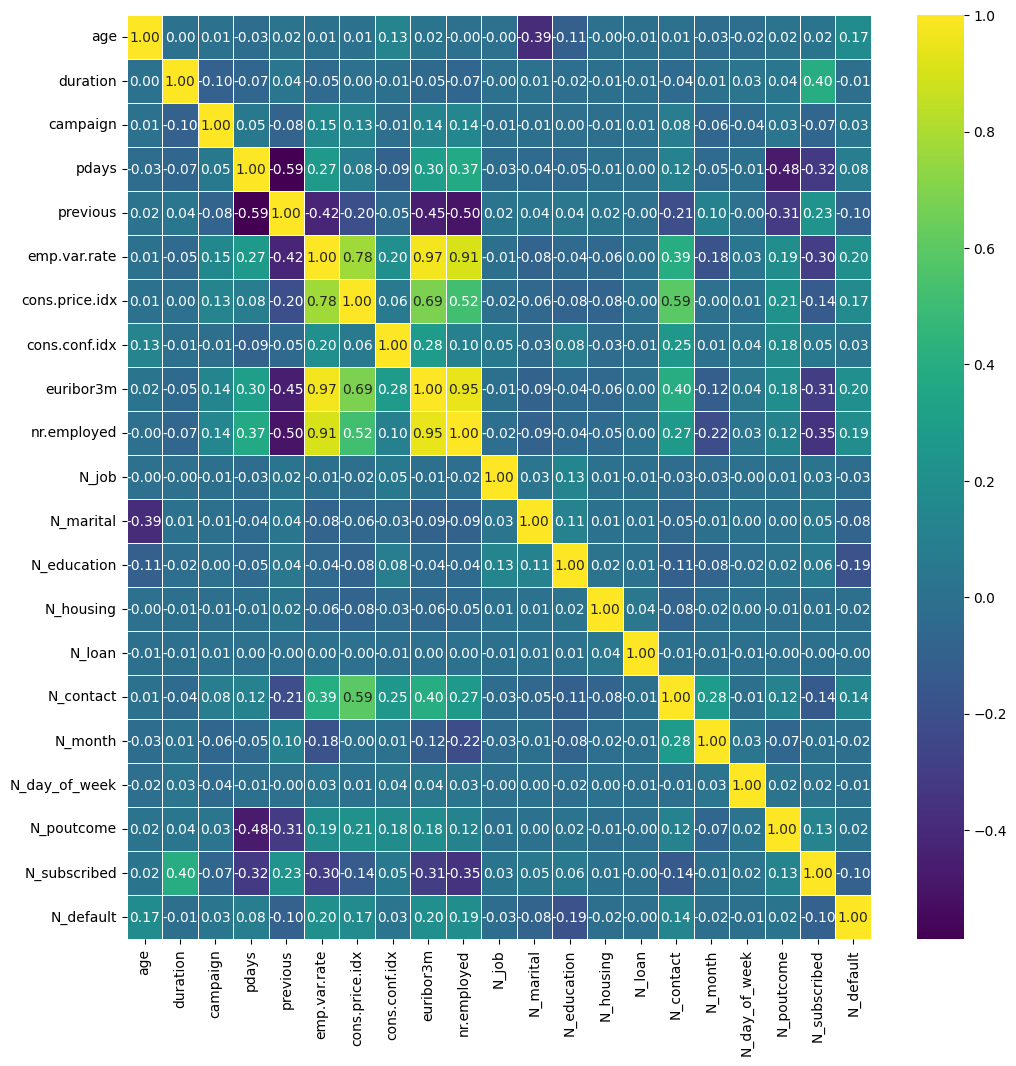

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.6,fmt=".2f",cmap="viridis")
plt.show()

In [ ]:
df2=df.drop(["emp.var.rate","euribor3m","nr.employed"],axis=1)

In [ ]:
df2.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,N_job,N_marital,N_education,N_housing,N_loan,N_contact,N_month,N_day_of_week,N_poutcome,N_subscribed,N_default
0,56.0,261.0,1,999,0,93.994,-36.4,3,1,0,0,0,1,6,1,1,0,0
1,57.0,149.0,1,999,0,93.994,-36.4,7,1,3,0,0,1,6,1,1,0,1
2,37.0,226.0,1,999,0,93.994,-36.4,7,1,3,2,0,1,6,1,1,0,0
3,40.0,151.0,1,999,0,93.994,-36.4,0,1,1,0,0,1,6,1,1,0,0
4,56.0,307.0,1,999,0,93.994,-36.4,7,1,3,0,2,1,6,1,1,0,0


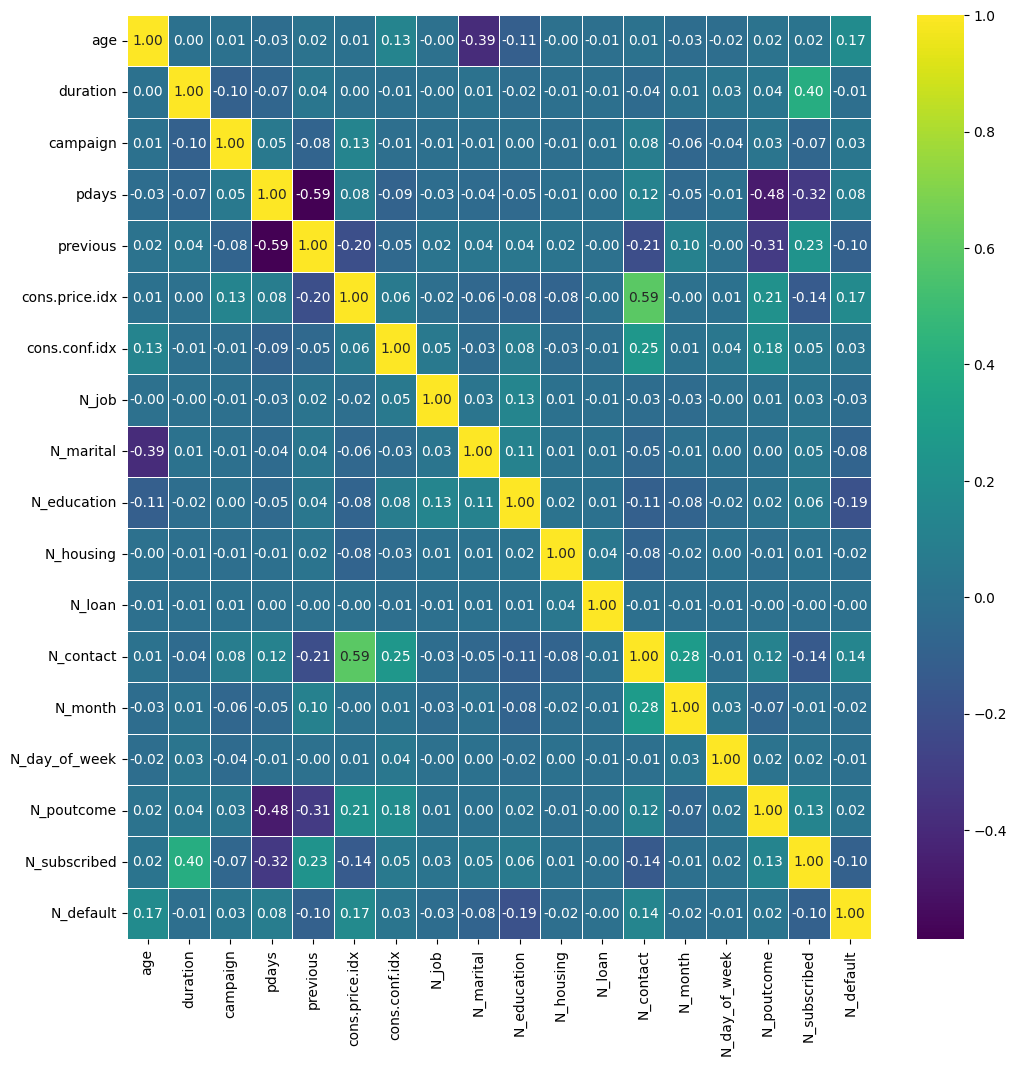

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(),annot=True,linewidths=0.6,fmt=".2f",cmap="viridis")
plt.show()

In [ ]:
kmeans=KMeans().fit(df2)

In [ ]:
score=[]
K=range(1,20)

for i in K:
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(df2)
    score.append(kmeans.inertia_)

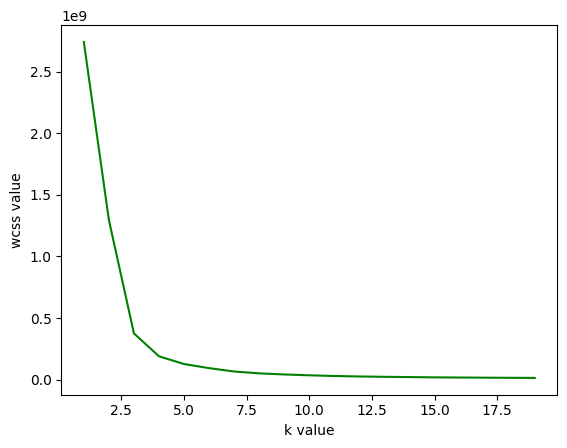

In [ ]:
#visualize;

plt.plot(K,score,color="green")
plt.xlabel("k value")
plt.ylabel("wcss value")
plt.show()

In [ ]:
!pip install yellowbrick

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

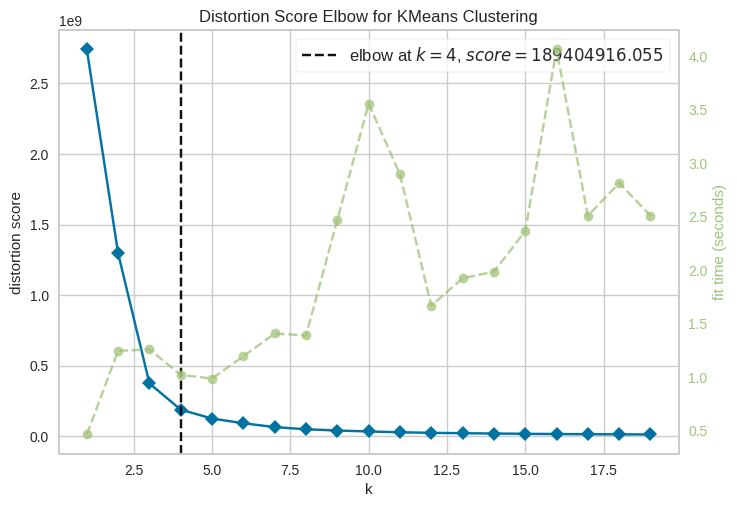

In [ ]:
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,20))
visualizer.fit(df2)
visualizer.poof()
plt.show()

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,39.939485,10.129367,17.000,32.000,38.000,47.000,69.500
duration,41188.0,234.997317,177.353309,0.000,102.000,180.000,319.000,644.500
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
N_job,41188.0,3.724580,3.594560,0.000,0.000,2.000,7.000,11.000
N_marital,41188.0,1.172769,0.608902,0.000,1.000,1.000,2.000,3.000
N_education,41188.0,3.747184,2.136482,0.000,2.000,3.000,6.000,7.000


In [ ]:
x_std=StandardScaler().fit_transform(df2)

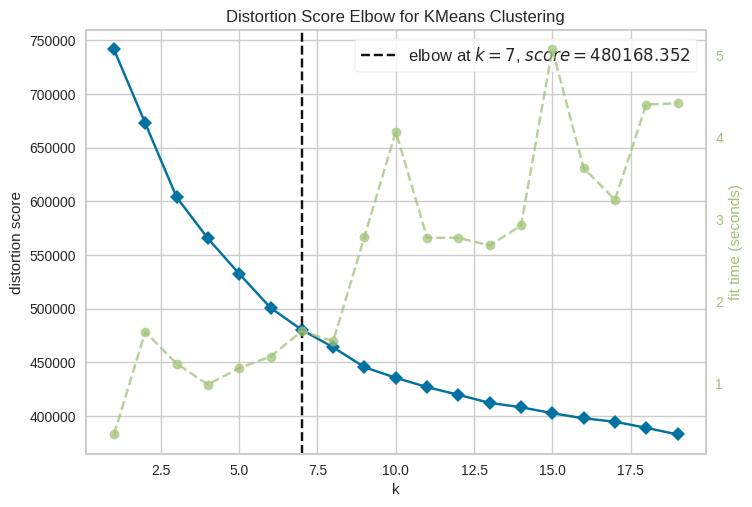

In [ ]:
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,20))
visualizer.fit(x_std)
visualizer.poof()
plt.show()

In [ ]:
#final model
kmeans=KMeans(n_clusters=4,init="k-means++").fit(df2)

In [ ]:
#etiket  değerlerimizi ekleyelim;
#let's add our tag values;

In [ ]:
cluster=kmeans.labels_
cluster

array([0, 2, 0, ..., 2, 3, 0], dtype=int32)

In [ ]:
# our tags are between 0-3
# now let's sort into clusters
#şimdi kümelere ayıralım
df2["cluster_no"]=cluster
df2.head()


,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,N_job,N_marital,N_education,N_housing,N_loan,N_contact,N_month,N_day_of_week,N_poutcome,N_subscribed,N_default,cluster_no
0,56.0,261.0,1,999,0,93.994,-36.4,3,1,0,0,0,1,6,1,1,0,0,0
1,57.0,149.0,1,999,0,93.994,-36.4,7,1,3,0,0,1,6,1,1,0,1,2
2,37.0,226.0,1,999,0,93.994,-36.4,7,1,3,2,0,1,6,1,1,0,0,0
3,40.0,151.0,1,999,0,93.994,-36.4,0,1,1,0,0,1,6,1,1,0,0,2
4,56.0,307.0,1,999,0,93.994,-36.4,7,1,3,0,2,1,6,1,1,0,0,0


In [ ]:
df2["cluster_no"].value_counts()

,count
cluster_no,
2,22317
0,11487
3,5869
1,1515


In [ ]:
# We observed how many elements were assigned to which cluster.
# hangi kümeye kaç eleman atandığını gözlemledik

**6.PCA**
We observed a high correlation between some variables.It would be wise to use the PCA method for this.

bazı değişkenler arasında yüksek korelasyon olduğunu gözlemledik.Bunun için PCA yöntemini kullanmak akıllıca olacaktır.

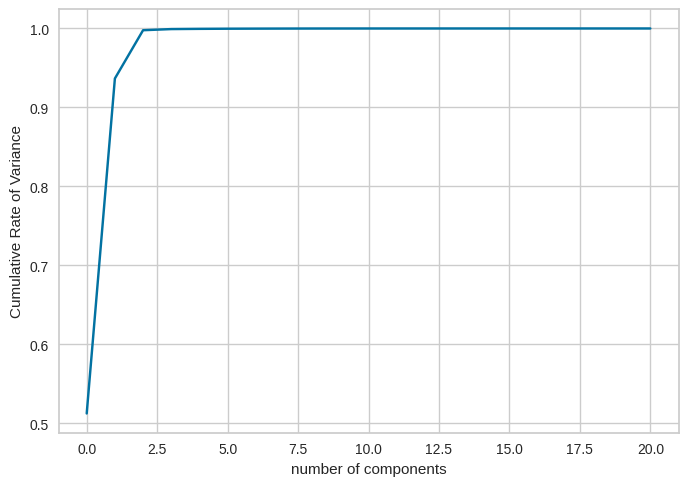

In [ ]:
#Here, let's try PCA over the (df) dataset before the variables are removed.
#Burada değişkenler kaldırılmadan önce (df) veri seti üzerinden PCA deneyelim.
#optimum component

pca=PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("Cumulative Rate of Variance")
plt.show()

In [ ]:
#If we choose the variable size 3, it gives an explainability rate of 100%.
#Değişken boyutunu 3 seçersek %100 lük bir açıklanabilirlik oranı veriyor.
#final model
pca=PCA(n_components=3).fit(df)
#variance ratio
pca.explained_variance_ratio_

array([0.51252102, 0.42414772, 0.06111909])

**7.Conclusion**
We performed segmentation with clustering algorithms using the bank marketing dataset. The dataset is related to the direct marketing campaigns (phone calls) of a Portuguese banking institution. Based on this data, we performed various transactions. Our dataset consists of 41188 observations and 21 features.

Bank marketing verisetini kullanarak kümeleme algoritmaları ile segmentasyon işlemi gerçekleştirdik. Veriseti;bir Portekiz bankacılık kurumunun doğrudan pazarlama kampanyaları (telefon görüşmeleri) ile ilgilidir.Bu verilerden yola çıkarak çeşitli işlemler gerçekleştirdik. Verisetimiz 41188 gözlem ve 21 öznitelikten oluşmaktadır.